19454.55908 0.0


D:\flask\FlaskPython\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
D:\flask\FlaskPython\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
D:\flask\FlaskPython\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_18 (Dense)              │ (None, 32)            │          672 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_18 (Activation)    │ (None, 32)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_12 (Dropout)          │ (None, 32)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_19 (Dense)              │ (None, 64)            │        2,112 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_19 (Activation)    │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_13 (Dropout)          │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_20 (Dense)              │ (None, 4)             │          260 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_20 (Activation)    │ (None, 4)             │            0 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 3,044 (11.89 KB)

 Trainable params: 3,044 (11.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2660 - loss: 0.1782 - val_accuracy: 0.4650 - val_loss: 0.1420
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3487 - loss: 0.1668 - val_accuracy: 0.3850 - val_loss: 0.1358
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3683 - loss: 0.1580 - val_accuracy: 0.4000 - val_loss: 0.1291
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4341 - loss: 0.1461 - val_accuracy: 0.5450 - val_loss: 0.1183
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5083 - loss: 0.1344 - val_accuracy: 0.4100 - val_loss: 0.1162
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4865 - loss: 0.1343 - val_accuracy: 0.6350 - val_loss: 0.1094
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5541 - loss: 0.1242 - val_accuracy: 0.7750 - val_loss: 0.1039
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5793 - loss: 0.1177 - val_accuracy: 0.6800 - 

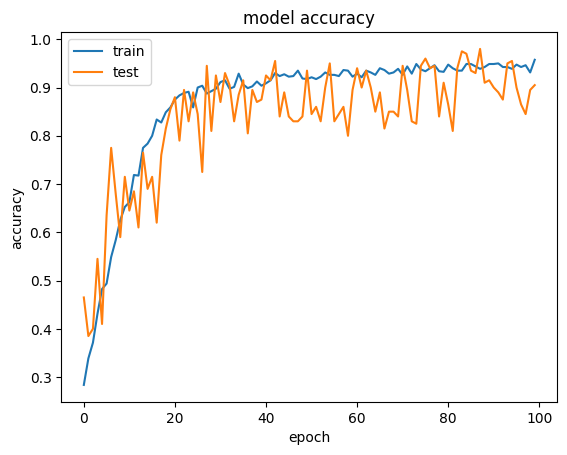

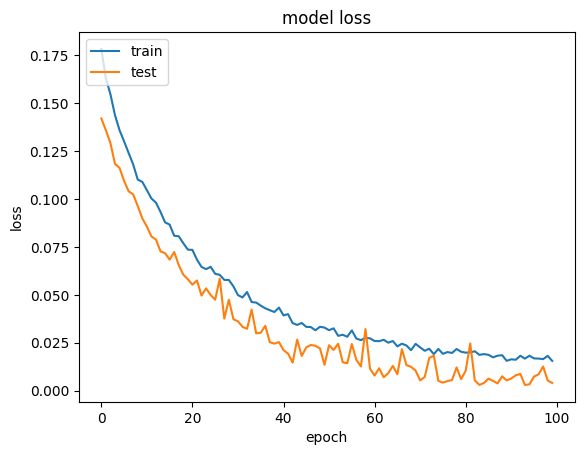

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  1 01:43:07 2020

@author: devel
"""
import os
os.chdir("D:/flask/AI_UAS/")

#%%
import pandas as pd
import numpy as np

data = pd.read_csv("Datasets/air-comp.csv", sep=",")

#%%

x_data = data.drop(["id", "acmotor"], axis=1)

x_data['bearings'] = [0 if each == "Ok" else 1 for each in data.bearings]
x_data['wpump'] = [0 if each == "Ok" else 1 for each in data.wpump]
x_data['radiator'] = [0 if each == "Clean" else 1 for each in data.radiator]
x_data['exvalve'] = [0 if each == "Clean" else 1 for each in data.exvalve]

# 0 = Ok, 1 = Noisy for bearings and water pump
# 0 = Clean, 1 = Dirty for radiator and exhaust valve

#%%

maxval = np.max(x_data)
minval = np.min(x_data)
std_dv = np.std(x_data)
mean = np.mean(x_data)

print(maxval, minval)

#%%

splitted_data = np.split(x_data, [20], axis=1)
x_data = splitted_data[0]
y_data = splitted_data[1]

#%%

col_names = x_data.columns.values.tolist()

norm_minmaxdata = {'minnorm': [0, 0, 0, 0, 0, 30, 60, 0, 30, 30, 200, 30, 250, 40, 0, 0, 0, 0, 0, 0], 
                   'maxnorm': [3000, 25000, 150, 12, 1800, 100, 200, 6, 150, 200, 275, 80, 320, 50, 2, 2, 12, 2, 2, 10]}
norm_minmax = pd.DataFrame(norm_minmaxdata, columns=['minnorm', 'maxnorm'])

minnorm = norm_minmax.minnorm.values
maxnorm = norm_minmax.maxnorm.values

#%%

x_norm = (x_data - minnorm) / (maxnorm - minnorm)

#%%

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

#%%

model = Sequential()
model.add(Dense(32, input_dim=20))
model.add(Activation('relu'))

model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(4))
model.add(Activation('relu'))
model.summary()

#%%

model.compile(optimizer="rmsprop", loss='mse', metrics=['accuracy'])

#%%

history = model.fit(x_norm, y_data, epochs=100, validation_split=0.2)

#%%
from keras.models import model_from_json, load_model

model_json = model.to_json()
with open("Models/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("Models/model.weights.h5")

json_file = open('Models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("Models/model.weights.h5")

model.save('Models/model.keras')
loaded_model = load_model('Models/model.keras')

#%%

score = model.evaluate(x_norm, y_data, verbose=0)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

#%%

# Predict classes using argmax with model.predict output
y_test_pred_class = np.argmax(model.predict(x_norm, verbose=1), axis=1)
y_test_pred = model.predict(x_norm, verbose=1)

#%%

import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('history.csv', index=False)